In [1]:
# Import standard modules

import os
import numpy as np
import astropy.constants as con
import matplotlib.pyplot as plt

# Import pymsg and read_mist_models

import pymsg
import read_mist_models

# Set constants

R_SUN = con.R_sun.cgs.value
PC = con.pc.cgs.value

# Set plot parameters

plt.rcParams.update({'font.size': 12})

In [2]:
# Create PhotGrid objects using the demo specgrid

MSG_DIR = os.environ['MSG_DIR']
GRID_DIR = os.path.join(MSG_DIR, 'data', 'grids')
PASS_DIR = os.path.join(MSG_DIR, 'data', 'passbands')

photgrid_B = pymsg.PhotGrid(os.path.join(GRID_DIR, 'sg-demo.h5'),
                            os.path.join(PASS_DIR, 'pb-Generic-Johnson.B-Vega.h5'))
photgrid_V = pymsg.PhotGrid(os.path.join(GRID_DIR, 'sg-demo.h5'),
                            os.path.join(PASS_DIR, 'pb-Generic-Johnson.V-Vega.h5'))

In [3]:
# Read isochrone data file

iso = read_mist_models.ISO('MIST.iso')

# Extract stellar parameters

Teff = 10**iso.isos[0]['log_Teff']
logg = iso.isos[0]['log_g']

R = 10**iso.isos[0]['log_R']*R_SUN

Reading in: MIST.iso


In [4]:
# Set the distance to the standard 10 parsecs used to define
# absolute magnitudes

d = 10*PC

# Evaluate irradiances

n = len(Teff)

F_obs_B = np.empty(n)
F_obs_V = np.empty(n)

for i in range(n):

    # Set up photospheric parameters dict

    x = {'Teff': Teff[i],
         'log(g)': logg[i]}
    
    # Evaluate irradiances. Use try/execpt clause to deal with 
    # points that fall outside the grid

    try:
        F_obs_B[i] = (R[i]/d)**2 * photgrid_B.flux(x)
        F_obs_V[i] = (R[i]/d)**2 * photgrid_V.flux(x)
    except (ValueError, LookupError):
        F_obs_B[i] = np.NAN
        F_obs_V[i] = np.NAN

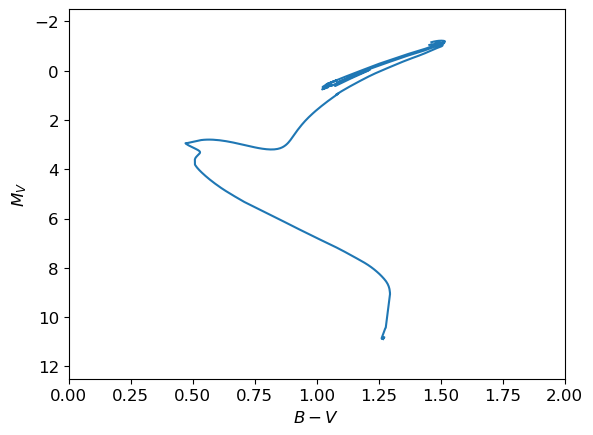

In [5]:
# Evaluate absolute magnitudes

M_B = -2.5*np.log10(F_obs_B)
M_V = -2.5*np.log10(F_obs_V)

# Plot the CMD

plt.figure()

plt.plot(M_B-M_V, M_V)

plt.xlim(0, 2)
plt.ylim(12.5,-2.5)

plt.xlabel('$B-V$')
plt.ylabel('$M_V$');